In [1]:
# Download Necessory Packages
!pip install geopy
!conda install -c conda-forge folium=0.5.0 --yes 

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
%matplotlib inline 
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Requirement not upgraded as not directly required: geopy in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    altair-2.2.2               |           py35_1         462 KB  conda-forge
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    -----------------------------------------

# Introduction



  According to Wikipedia, London is the largest City in the UK and has been a major settlement for two millennia now. London is also considered one of the world's most important global cities in the world with attributes such as most visited, most infleuntial, most expensive and most vegetarian freindly city in the world. There is a saying in my culture which goes like this " L'homme c'est le ventre et le bas ventre". This just means a man cannot do without food and african food is known to be one of the best in the world. I can only recommend having a taste if you have never done by now

# Business Problem
  I have a friend living in Manchester who came some two months back to pay me a visit. He is into Food Business and is looking to open up a Sub-Saharan-African Restaurant in London neighborhood. Since he knows i am a data scientist, he asked to know which neighborhood will be the best suited for his Restaurant. The idea of this project is to locate the best Neighborhood in London to open a Restaurant for people of Sub-Saharan African descend. I will use the immigration data in London and Foursquare to evaluate and select the neighborhood suitable for my friend. This information could be of great help to Business people who may want to modify their Menu based on the preferences of the people living in that particular area.

# Data Set

+ The data that would be used for this project is the immigration data taken from the London data store. This data presents Annual population survey based on diversity or country of birth. This data is published by the office for national statistics (ONS). The data set gives us information on the annual population survey of migrants, immigrants, british, UK born between 2004 and 2017. The population figures are measured in thousands. The other source of data was the venues in each Neighborhood in London collected from https://developer.foursquare.com/

# Variable description

- Year tells us the year in which the survey was conducted
- Area_Code is the code of the area in which the survey was conducted
- Area_Name is the name of the area in question
- Broad_goup tells us if the people surveyed are British, from the European Union or Non-European Union
- Detailed_group specifies where the people surveyed exactly came from. e.g from north america or south asia
- Estimate provides the estimated total number of people surveyed in thousands

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
London_df.head()

,Year,Area_Code,Area_Name,Broad_group,Detailed_group,Estimate,CI
0,2017,E09000001,City of London,Total,Total,:,:
1,2017,E09000002,Barking and Dagenham,Total,Total,210,z
2,2017,E09000003,Barnet,Total,Total,391,z
3,2017,E09000004,Bexley,Total,Total,247,z
4,2017,E09000005,Brent,Total,Total,333,z


In [4]:
# Determine the detailed groups in the data set
London_df.Detailed_group.unique()

array(['Total', 'United Kingdom', 'Non-United Kingdom', 'All',
       'European Union EU14', 'European Union EU8', 'European Union EU2',
       'European Union Other', 'Other Europe',
       'Middle East and Central Asia', 'East Asia', 'South Asia',
       'South East Asia', 'Sub-Saharan Africa', 'North Africa',
       'North America', 'Central and South America', 'Oceania'], dtype=object)

In [5]:
# Now get information on the population we are interested in - sub saharan africa
ssa = London_df[London_df.Detailed_group == 'Sub-Saharan Africa']
ssa

,Year,Area_Code,Area_Name,Broad_group,Detailed_group,Estimate,CI
735,2017,E09000001,City of London,Rest of the World,Sub-Saharan Africa,:,:
736,2017,E09000002,Barking and Dagenham,Rest of the World,Sub-Saharan Africa,19,7
737,2017,E09000003,Barnet,Rest of the World,Sub-Saharan Africa,16,9
738,2017,E09000004,Bexley,Rest of the World,Sub-Saharan Africa,13,6
739,2017,E09000005,Brent,Rest of the World,Sub-Saharan Africa,37,11
740,2017,E09000006,Bromley,Rest of the World,Sub-Saharan Africa,8,6
741,2017,E09000007,Camden,Rest of the World,Sub-Saharan Africa,12,6
742,2017,E09000008,Croydon,Rest of the World,Sub-Saharan Africa,30,11
743,2017,E09000009,Ealing,Rest of the World,Sub-Saharan Africa,21,10
744,2017,E09000010,Enfield,Rest of the World,Sub-Saharan Africa,20,9


In [6]:
# From the results above, we can see that some areas are showing some outliers and i will remove them here
dropcol = ['England','United Kingdom','London','Inner London','Outer London','South East']
New_ssa = ssa[~ssa.Area_Name.isin(dropcol)]
New_ssa

,Year,Area_Code,Area_Name,Broad_group,Detailed_group,Estimate,CI
735,2017,E09000001,City of London,Rest of the World,Sub-Saharan Africa,:,:
736,2017,E09000002,Barking and Dagenham,Rest of the World,Sub-Saharan Africa,19,7
737,2017,E09000003,Barnet,Rest of the World,Sub-Saharan Africa,16,9
738,2017,E09000004,Bexley,Rest of the World,Sub-Saharan Africa,13,6
739,2017,E09000005,Brent,Rest of the World,Sub-Saharan Africa,37,11
740,2017,E09000006,Bromley,Rest of the World,Sub-Saharan Africa,8,6
741,2017,E09000007,Camden,Rest of the World,Sub-Saharan Africa,12,6
742,2017,E09000008,Croydon,Rest of the World,Sub-Saharan Africa,30,11
743,2017,E09000009,Ealing,Rest of the World,Sub-Saharan Africa,21,10
744,2017,E09000010,Enfield,Rest of the World,Sub-Saharan Africa,20,9


In [7]:
!pip install geopandas
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame
from shapely.geometry import Point
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
from pyproj import Proj
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
import pyproj
from pyproj import Proj
print('Folium installed')
print('Libraries imported.')

    100% |████████████████████████████████| 901kB 1.2MB/s eta 0:00:01
Requirement not upgraded as not directly required: pandas in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from geopandas)
    100% |████████████████████████████████| 1.5MB 756kB/s eta 0:00:01
    100% |████████████████████████████████| 10.8MB 102kB/s eta 0:00:01
    100% |████████████████████████████████| 17.9MB 61kB/s  eta 0:00:01
Requirement not upgraded as not directly required: python-dateutil>=2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pandas->geopandas)
Requirement not upgraded as not directly required: pytz>=2011k in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pandas->geopandas)
Requirement not upgraded as not directly required: numpy>=1.9.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pandas->geopandas)
Requirement not upgraded as not directly required: six>=1.7 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from fiona

# Use Foursqaure API to Explore London

In [8]:
CLIENT_ID = 'FFZAU5OEJ51VVBRQV40B05Z4WSCBZ5QQ0QA2QECZ0NMXGLKH' # your Foursquare ID
CLIENT_SECRET = 'DSDB0ZMR5XYEL435M1JDWQBWPDXJ5CI2DGNRKYO53VRYZS3D' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

#### Get coordinates  of London
address = 'City of London, UK'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of City of London are {}, {}.'.format(latitude, longitude))

Your credentails:
CLIENT_ID: FFZAU5OEJ51VVBRQV40B05Z4WSCBZ5QQ0QA2QECZ0NMXGLKH
CLIENT_SECRET:DSDB0ZMR5XYEL435M1JDWQBWPDXJ5CI2DGNRKYO53VRYZS3D
The geograpical coordinate of City of London are 51.5156177, -0.0919983.


In [9]:
### Check the number of unique neighborhoods where the sub-saharan africans live
Area=New_ssa['Area_Name'].unique()
Area
len(Area)

43

In [ ]:
Lat_Long=[]
for x in Area:
    i=0
    address=x
    geolocator = Nominatim(user_agent="ny_chrome")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    Lat_Long[:i]=[{'Area_Name':x, 'latitude':latitude,'longitude':longitude}]
    i=+1

In [32]:
### Change the latitudes and longitudes into a dataframe
Lat_Long=pd.DataFrame(Lat_Long)
Lat_Long.head()

,Area_Name,latitude,longitude
0,Sutton,51.357511,-0.173640
1,Southwark,51.502922,-0.103458
2,Richmond upon Thames,51.440354,-0.308151
3,Redbridge,51.576253,0.045410
4,Newham,51.530000,0.029318


In [33]:
## Merge the sub-saharan data with the latitudes and longitudes while removing undesired estimate values
London_boro=pd.merge(New_ssa,Lat_Long, on=['Area_Name'])
London_boro=London_boro[~London_boro.Estimate.str.contains(':')]
London_boro=London_boro[~London_boro.Estimate.str.contains('z')]
London_boro=London_boro[~London_boro.Estimate.str.contains('c')]
London_boro = London_boro[~London_boro['Estimate'].isin(['.'])]

In [34]:
London_boro.head()

,Year,Area_Code,Area_Name,Broad_group,Detailed_group,Estimate,CI,latitude,longitude
14,2017,E09000002,Barking and Dagenham,Rest of the World,Sub-Saharan Africa,19,7,51.554117,0.150504
15,2016,E09000002,Barking and Dagenham,Rest of the World,Sub-Saharan Africa,21,7,51.554117,0.150504
16,2015,E09000002,Barking and Dagenham,Rest of the World,Sub-Saharan Africa,24,7,51.554117,0.150504
17,2014,E09000002,Barking and Dagenham,Rest of the World,Sub-Saharan Africa,22,7,51.554117,0.150504
18,2013,E09000002,Barking and Dagenham,Rest of the World,Sub-Saharan Africa,23,7,51.554117,0.150504


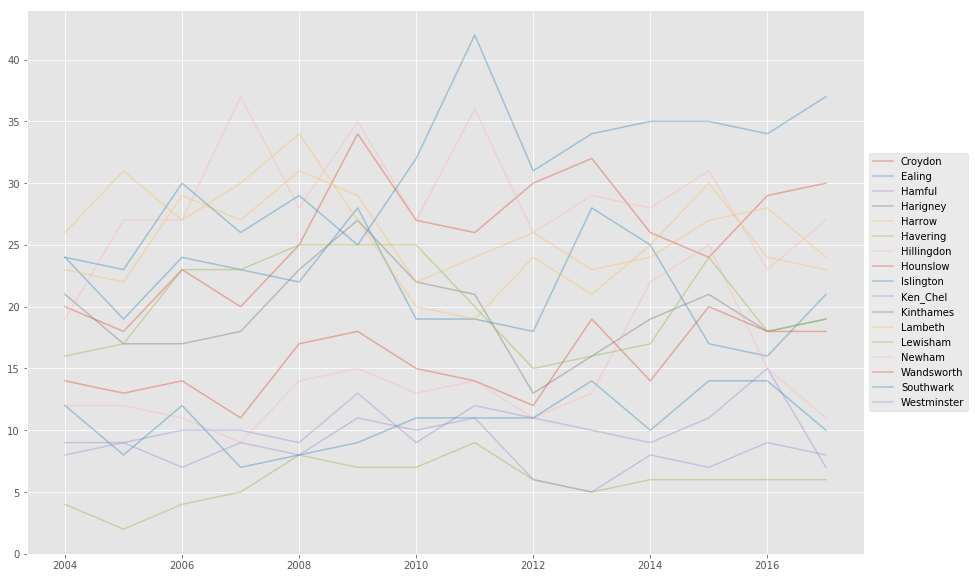

In [35]:
# Now make a time series plot of the development of the movement of sub saharan africans in the last years around the London neighborhood
London_boro['Estimate']=London_boro['Estimate'].astype(float)

London_Croydon=London_boro[(London_boro['Detailed_group']=='Sub-Saharan Africa') & (London_boro['Area_Name']=='Croydon')]
London_Ealing=London_boro[(London_boro['Detailed_group']=='Sub-Saharan Africa') & (London_boro['Area_Name']=='Ealing')]
London_Hamful=London_boro[(London_boro['Detailed_group']=='Sub-Saharan Africa') & (London_boro['Area_Name']=='Hammersmith and Fulham')]
London_Haringey=London_boro[(London_boro['Detailed_group']=='Sub-Saharan Africa') & (London_boro['Area_Name']=='Haringey')]
London_Harrow=London_boro[(London_boro['Detailed_group']=='Sub-Saharan Africa') & (London_boro['Area_Name']=='Harrow')]
London_Havering=London_boro[(London_boro['Detailed_group']=='Sub-Saharan Africa') & (London_boro['Area_Name']=='Havering')]
London_Hillingdon=London_boro[(London_boro['Detailed_group']=='Sub-Saharan Africa') & (London_boro['Area_Name']=='Hillingdon')]
London_Hounslow=London_boro[(London_boro['Detailed_group']=='Sub-Saharan Africa') & (London_boro['Area_Name']=='Hounslow')]
London_Islington=London_boro[(London_boro['Detailed_group']=='Sub-Saharan Africa') & (London_boro['Area_Name']=='Islington')]
London_Ken_Chel=London_boro[(London_boro['Detailed_group']=='Sub-Saharan Africa') & (London_boro['Area_Name']=='Kensington and Chelsea')]
London_Kinthames=London_boro[(London_boro['Detailed_group']=='Sub-Saharan Africa') & (London_boro['Area_Name']=='Kingstone upon Thames')]
London_Lambeth=London_boro[(London_boro['Detailed_group']=='Sub-Saharan Africa') & (London_boro['Area_Name']=='Lambeth')]
London_Lewisham=London_boro[(London_boro['Detailed_group']=='Sub-Saharan Africa') & (London_boro['Area_Name']=='Lewisham')]
London_Newham=London_boro[(London_boro['Detailed_group']=='Sub-Saharan Africa') & (London_boro['Area_Name']=='Newham')]
London_Southwark=London_boro[(London_boro['Detailed_group']=='Sub-Saharan Africa') & (London_boro['Area_Name']=='Southwark')]
London_Wandsworth=London_boro[(London_boro['Detailed_group']=='Sub-Saharan Africa') & (London_boro['Area_Name']=='Wandsworth')]
London_Westminster=London_boro[(London_boro['Detailed_group']=='Sub-Saharan Africa') & (London_boro['Area_Name']=='Westminster')]



from matplotlib import pyplot as plt

plt.figure(figsize=(15,10))

#plt.subplot(321)
plt.plot('Year','Estimate',data=London_Croydon, alpha=0.4,label='Croydon')
plt.plot('Year','Estimate',data=London_Ealing, alpha=0.4,label='Ealing')
plt.plot('Year','Estimate',data=London_Hamful, alpha=0.4,label='Hamful')
plt.plot('Year','Estimate',data=London_Haringey, alpha=0.4,label='Harigney')
plt.plot('Year','Estimate',data=London_Harrow, alpha=0.4,label='Harrow')
plt.plot('Year','Estimate',data=London_Havering, alpha=0.4,label='Havering')
plt.plot('Year','Estimate',data=London_Hillingdon, alpha=0.4,label='Hillingdon')
plt.plot('Year','Estimate',data=London_Hounslow, alpha=0.4,label='Hounslow')
plt.plot('Year','Estimate',data=London_Islington, alpha=0.4,label='Islington')
plt.plot('Year','Estimate',data=London_Ken_Chel, alpha=0.4,label='Ken_Chel')
plt.plot('Year','Estimate',data=London_Kinthames, alpha=0.4,label='Kinthames')
plt.plot('Year','Estimate',data=London_Lambeth, alpha=0.4,label='Lambeth')
plt.plot('Year','Estimate',data=London_Lewisham, alpha=0.4,label='Lewisham')
plt.plot('Year','Estimate',data=London_Newham, alpha=0.4,label='Newham')
plt.plot('Year','Estimate',data=London_Wandsworth, alpha=0.4,label='Wandsworth')
plt.plot('Year','Estimate',data=London_Southwark,alpha=0.4,label='Southwark')
plt.plot('Year','Estimate',data=London_Westminster, alpha=0.4,label='Westminster')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [36]:
# Now we should remove any duplicates from the dataframe
London_areas=London_boro[['Area_Name','latitude','longitude']]
London_areas_unique=London_areas.drop_duplicates()
London_areas_unique

,Area_Name,latitude,longitude
14,Barking and Dagenham,51.554117,0.150504
28,Barnet,44.297316,-72.049713
42,Bexley,51.441679,0.150488
56,Brent,41.113671,-80.167005
70,Bromley,51.402805,0.014814
84,Camden,39.944840,-75.119891
98,Croydon,51.371305,-0.101957
112,Ealing,51.512655,-0.305195
126,Enfield,51.652085,-0.081018
140,Greenwich,52.036732,1.168934


# Generate Map of London

In [38]:
#Show an initial map of the neighborhoods in London
# create map of London using first entries latitude and longitude values
map_london = folium.Map(location = [latitude,longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(London_areas_unique['latitude'], London_areas_unique['longitude'], London_areas_unique['Area_Name']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
# display map
map_london

In [37]:
#Setup API URL to explore venues with african Restaurants

LIMIT = 600
radius = 70000  # I used this radius to really explore abit more 
categoryID = '4bf58dd8d48988d1c8941735' # This category ID is goten from the venue categories in foursquare
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT, categoryID)
neighborhood_json = requests.get(url).json()

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
venues = neighborhood_json['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Adulis,African Restaurant,51.479486,-0.111702
1,Zeret Kitchen,African Restaurant,51.478626,-0.094378
2,Ikoyi London,African Restaurant,51.509291,-0.132993
3,Mosob,African Restaurant,51.523967,-0.200840
4,The Gold Coast Bar & Restaurant,African Restaurant,51.391771,-0.066337
5,Zoe's Ghana Kitchen,African Restaurant,51.463339,-0.112309
6,Koshari Street,African Restaurant,51.510889,-0.127005
7,GOGOS Waterfront Restaurant & Cocktail Bar,African Restaurant,51.488062,-0.637037
8,African Volcano,African Restaurant,51.499085,-0.075422
9,African Kitchen Gallery,African Restaurant,51.527255,-0.136453


# I was actually expecting a small number of Restaurants but there were quite a bit. But since this is the business problem i am trying to solve. I have to deal with the results i have.

# General Venue Data Collection

In [39]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            categoryID)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Name', 
                  'Latitude', 
                  'Longitude',
                  'Venue',           
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#Get all Neighbors
ssa_venues_df = getNearbyVenues(names=London_areas_unique['Area_Name'],
                                   latitudes=London_areas_unique['latitude'],
                                   longitudes=London_areas_unique['longitude'])

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton


# Now create a map of London again adding the african Restaurants as red circle markers

In [40]:
#Show an initial map of the neighborhoods in London
# create map of London using first entries latitude and longitude values
map_london = folium.Map(location = [latitude,longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(London_areas_unique['latitude'], London_areas_unique['longitude'], London_areas_unique['Area_Name']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
    # add the African restaurants as red circle markers
for lat, lng, label in zip(nearby_venues.lat, nearby_venues.lng, nearby_venues.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=6,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.7).add_to(map_london)
# display map
map_london

In [41]:
# Now calculate the distance of the african restaurants from the unique neighborhoods of London
la = London_areas_unique.reset_index(drop = True)  # la refers to London area
la['Area_Number'] = range(0,len(la))


from scipy.spatial import distance
rest_cor=nearby_venues[['lat','lng']].values # Restaurant coordinates
london_cor=la[['latitude','longitude']].values  # London coordinates

dist=distance.cdist(rest_cor, london_cor, 'euclidean')
dist_df= pd.DataFrame(dist) 
dist_df.columns = la.Area_Name.values
dist_df.index = nearby_venues.name.values
dist_df

,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith and Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington and Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton
Adulis,0.272621,72.295649,0.264902,80.723612,0.147941,75.889897,0.108619,0.196315,0.175306,1.396622,0.089168,0.112639,0.108627,0.254241,0.072613,0.342483,0.249881,0.060112,0.057089,0.206721,0.022519,0.102991,0.102731,0.149795,0.184521,0.200308,0.024844,0.136799
Zeret Kitchen,0.256255,72.312802,0.247638,80.740683,0.132935,75.906889,0.107588,0.213546,0.173973,1.381101,0.078750,0.129956,0.109860,0.270105,0.082551,0.359677,0.267156,0.060058,0.074378,0.222835,0.032233,0.085787,0.115686,0.133941,0.170504,0.217172,0.025938,0.144745
Ikoyi London,0.287019,72.277433,0.291432,80.706332,0.182171,75.873391,0.141433,0.172236,0.151959,1.404709,0.090259,0.092275,0.083336,0.222225,0.036856,0.317088,0.231949,0.044088,0.041401,0.199888,0.017621,0.131492,0.112856,0.163626,0.190555,0.188236,0.030213,0.157128
Mosob,0.352636,72.211391,0.360836,80.640944,0.247360,75.808577,0.181888,0.104967,0.175419,1.462604,0.152699,0.039234,0.114883,0.154644,0.060105,0.248189,0.169784,0.101966,0.048896,0.155523,0.086573,0.200388,0.113879,0.230237,0.251739,0.136040,0.099630,0.168663
The Gold Coast Bar & Restaurant,0.270880,72.332135,0.222494,80.757393,0.081897,75.921461,0.041082,0.267706,0.260727,1.393509,0.152417,0.186542,0.200012,0.339752,0.171361,0.410667,0.304854,0.150450,0.139830,0.240589,0.120800,0.090287,0.123240,0.168098,0.215686,0.246647,0.117186,0.112640
Zoe's Ghana Kitchen,0.278050,72.293443,0.263689,80.720939,0.140801,75.886844,0.092615,0.199090,0.191322,1.403697,0.101718,0.114970,0.124782,0.261559,0.087117,0.345228,0.249093,0.076107,0.060925,0.201252,0.038287,0.102180,0.092217,0.156531,0.193971,0.197186,0.040561,0.122315
Koshari Street,0.280856,72.283550,0.285994,80.712476,0.178311,75.879552,0.141814,0.178199,0.148496,1.398560,0.084113,0.098457,0.080010,0.227132,0.037684,0.322883,0.238125,0.038637,0.047369,0.205881,0.013652,0.126519,0.117259,0.157487,0.184389,0.194394,0.024858,0.160311
GOGOS Waterfront Restaurant & Cocktail Bar,0.790307,71.773791,0.788890,80.203764,0.657403,75.372020,0.547671,0.332752,0.579708,1.887478,0.590260,0.413416,0.540926,0.318865,0.495941,0.196403,0.276375,0.539489,0.468817,0.339947,0.519919,0.627428,0.455539,0.667674,0.688122,0.332328,0.533786,0.481436
African Volcano,0.232533,72.333699,0.233090,80.762110,0.131957,75.928735,0.130506,0.230173,0.153102,1.355539,0.051272,0.148385,0.093769,0.279480,0.082433,0.375433,0.287544,0.046339,0.093513,0.247567,0.041923,0.074874,0.143142,0.109207,0.143371,0.240025,0.028297,0.172307
African Kitchen Gallery,0.288212,72.275784,0.299430,80.705217,0.195882,75.872711,0.159720,0.169373,0.136586,1.401286,0.088546,0.094031,0.068155,0.212513,0.018828,0.312255,0.232414,0.038218,0.050856,0.206570,0.032264,0.141981,0.127390,0.165794,0.188348,0.192437,0.040997,0.173769


In [42]:
# Where exactly are these 71 Restaurants found
rest=dist_df.idxmin(axis=1)
rest_df=pd.DataFrame(data=rest)
rest_df.reset_index(inplace=True)
rest_df.columns=['name','Area_Name']
rest_df = pd.concat([nearby_venues[['name','lat','lng']], rest_df.Area_Name], axis=1, join='inner')
rest_df_a = pd.merge(rest_df, la, how='left', on='Area_Name')
rest_df


,name,lat,lng,Area_Name
0,Adulis,51.479486,-0.111702,Lambeth
1,Zeret Kitchen,51.478626,-0.094378,Southwark
2,Ikoyi London,51.509291,-0.132993,Lambeth
3,Mosob,51.523967,-0.200840,Hammersmith and Fulham
4,The Gold Coast Bar & Restaurant,51.391771,-0.066337,Croydon
5,Zoe's Ghana Kitchen,51.463339,-0.112309,Lambeth
6,Koshari Street,51.510889,-0.127005,Lambeth
7,GOGOS Waterfront Restaurant & Cocktail Bar,51.488062,-0.637037,Hillingdon
8,African Volcano,51.499085,-0.075422,Southwark
9,African Kitchen Gallery,51.527255,-0.136453,Havering


In [43]:
rest_df['Area_Name'].value_counts()

Lambeth                   19
Islington                 11
Havering                   9
Southwark                  7
Kensington and Chelsea     7
Hillingdon                 4
Hammersmith and Fulham     3
Sutton                     2
Merton                     2
Croydon                    2
Newham                     2
Barking and Dagenham       1
Ealing                     1
Haringey                   1
Hounslow                   1
Kingston upon Thames       1
Harrow                     1
Hackney                    1
Lewisham                   1
Name: Area_Name, dtype: int64

# So we can see from the results above that the highest number of African Restaurants are found in Lambeth followed by Islington and Havering

In [44]:
rest_df_an=rest_df_a.drop(['latitude','longitude'],axis=1) # Drop the longitude and latitude values from the restaurant dataframe
rest_df_an

,name,lat,lng,Area_Name,Area_Number
0,Adulis,51.479486,-0.111702,Lambeth,20
1,Zeret Kitchen,51.478626,-0.094378,Southwark,26
2,Ikoyi London,51.509291,-0.132993,Lambeth,20
3,Mosob,51.523967,-0.200840,Hammersmith and Fulham,11
4,The Gold Coast Bar & Restaurant,51.391771,-0.066337,Croydon,6
5,Zoe's Ghana Kitchen,51.463339,-0.112309,Lambeth,20
6,Koshari Street,51.510889,-0.127005,Lambeth,20
7,GOGOS Waterfront Restaurant & Cocktail Bar,51.488062,-0.637037,Hillingdon,15
8,African Volcano,51.499085,-0.075422,Southwark,26
9,African Kitchen Gallery,51.527255,-0.136453,Havering,14


In [45]:
map_london = folium.Map(location=[latitude, longitude], zoom_start=11)

import matplotlib.cm as cm
import matplotlib.colors as colors
# add markers to map
for lat, lng, borough in zip(London_areas_unique['latitude'], London_areas_unique['longitude'], London_areas_unique['Area_Name']):
    label = '{}'.format( borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  

    
a = np.arange(len(la.Area_Name))
b = [i + a + (i*a)**2 for i in range(len(la.Area_Name))]
colors_array = cm.rainbow(np.linspace(0, 1, len(b)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
for lat, lng, poi ,area in zip(rest_df_an.lat, rest_df_an.lng, rest_df_an.Area_Name, rest_df_an.Area_Number):
    label = folium.Popup(str(poi) + ' Cluster ' + str(area), parse_html=True)
    folium.features.CircleMarker(
        [lat, lng],
        radius=6,
        color=rainbow[area-1],
        popup=label,
        fill = True,
        fill_color=rainbow[area-1],
        fill_opacity=0.6).add_to(map_london)

# display map
map_london

In [46]:
# Determine where the highest number of sub-saharan africans live 
London_boro.sort_values('Area_Name',inplace = True)
London_boro.drop_duplicates(subset = 'Area_Name',inplace = True)
London_boro
# The result below shows that about 91 thousand people of sub-saharan african descend lived in East Midlands in 2017 while 82 thousand lived in the East

,Year,Area_Code,Area_Name,Broad_group,Detailed_group,Estimate,CI,latitude,longitude
14,2017,E09000002,Barking and Dagenham,Rest of the World,Sub-Saharan Africa,19.0,7,51.554117,0.150504
36,2009,E09000003,Barnet,Rest of the World,Sub-Saharan Africa,18.0,9,44.297316,-72.049713
55,2004,E09000004,Bexley,Rest of the World,Sub-Saharan Africa,5.0,4,51.441679,0.150488
64,2009,E09000005,Brent,Rest of the World,Sub-Saharan Africa,30.0,11,41.113671,-80.167005
82,2005,E09000006,Bromley,Rest of the World,Sub-Saharan Africa,11.0,6,51.402805,0.014814
97,2004,E09000007,Camden,Rest of the World,Sub-Saharan Africa,14.0,6,39.944840,-75.119891
106,2009,E09000008,Croydon,Rest of the World,Sub-Saharan Africa,34.0,12,51.371305,-0.101957
124,2005,E09000009,Ealing,Rest of the World,Sub-Saharan Africa,19.0,7,51.512655,-0.305195
139,2004,E09000010,Enfield,Rest of the World,Sub-Saharan Africa,14.0,7,51.652085,-0.081018
148,2009,E09000011,Greenwich,Rest of the World,Sub-Saharan Africa,23.0,8,52.036732,1.168934


# So After my analysis, i will advice him to open the african Restaurant in Croydon or in the East

# Thanks for taking out time to read through my battle for neighborhoods Project
- Sammy N.